In [1]:
import numpy as np
import pandas as pd

data=pd.read_csv('occupancy1.csv')
print(data.head())
print(data.info())



   index            date  Temperature  Humidity       Light         CO2  \
0    140  2/2/2015 14:19      23.7000    26.272  585.200000  749.200000   
1    141  2/2/2015 14:19      23.7180    26.290  578.400000  760.400000   
2    142  2/2/2015 14:21      23.7300    26.230  572.666667  769.666667   
3    143  2/2/2015 14:22      23.7225    26.125  493.750000  774.750000   
4    144  2/2/2015 14:23      23.7540    26.200  488.600000  779.000000   

  HumidityRatio  Occupancy  
0   0.004764163          1  
1   0.004772661          1  
2   0.004765153          1  
3   0.004743773          1  
4   0.004766594          1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7235 entries, 0 to 7234
Data columns (total 8 columns):
index            7235 non-null int64
date             7235 non-null object
Temperature      7235 non-null float64
Humidity         7235 non-null float64
Light            7235 non-null float64
CO2              7235 non-null float64
HumidityRatio    7235 non-null object


In [2]:
data
data['date']=pd.to_datetime(data['date'],format='%m/%d/%Y %H:%M')
data.set_index('date', inplace=True)  # set the date time as index
data=data.drop(columns=['index'])
print(data.head())


                     Temperature  Humidity       Light         CO2  \
date                                                                 
2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000   
2015-02-02 14:19:00      23.7180    26.290  578.400000  760.400000   
2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667   
2015-02-02 14:22:00      23.7225    26.125  493.750000  774.750000   
2015-02-02 14:23:00      23.7540    26.200  488.600000  779.000000   

                    HumidityRatio  Occupancy  
date                                          
2015-02-02 14:19:00   0.004764163          1  
2015-02-02 14:19:00   0.004772661          1  
2015-02-02 14:21:00   0.004765153          1  
2015-02-02 14:22:00   0.004743773          1  
2015-02-02 14:23:00   0.004766594          1  


In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
classifier=SGDClassifier(max_iter=1000)
#prepare data which is step 3
Y = data['Occupancy']  #price is the target, Y
X = np.array([data['Temperature'],data['Light']])  # X
X=X.T
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=43,test_size=0.2)
classifier.fit(xtrain,ytrain)
ypredict=classifier.predict(xtest)
print(accuracy_score(ytest,ypredict))  #percentage of classification on the test data is correct

0.9903248099516241


Text(91.68,0.5,'true value')

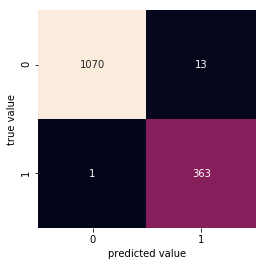

In [4]:
from sklearn.metrics import confusion_matrix
import  seaborn as sns
mat=confusion_matrix(ytest,ypredict)
sns.heatmap(mat,square=True,annot=True,cbar=False,fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')